In [ ]:
!pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 236kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
import plotly.express as px
import cufflinks as cf
cf.go_offline()
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn import metrics
import plotly.io as pio
# pio.renderers.default='notebook'

In [ ]:
!unzip test.csv.zip
!unzip train.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               


In [ ]:


# train=pd.read_csv('../input/covid19-global-forecasting-week-5/train.csv')
train=pd.read_csv('train.csv')
# test=pd.read_csv('../input/covid19-global-forecasting-week-5/test.csv')
test=pd.read_csv('test.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
train.shape

(969640, 9)

In [ ]:
train.head(3)

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311670 entries, 0 to 311669
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ForecastId      311670 non-null  int64  
 1   County          282870 non-null  object 
 2   Province_State  294840 non-null  object 
 3   Country_Region  311670 non-null  object 
 4   Population      311670 non-null  int64  
 5   Weight          311670 non-null  float64
 6   Date            311670 non-null  object 
 7   Target          311670 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 19.0+ MB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969640 entries, 0 to 969639
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Id              969640 non-null  int64  
 1   County          880040 non-null  object 
 2   Province_State  917280 non-null  object 
 3   Country_Region  969640 non-null  object 
 4   Population      969640 non-null  int64  
 5   Weight          969640 non-null  float64
 6   Date            969640 non-null  object 
 7   Target          969640 non-null  object 
 8   TargetValue     969640 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 66.6+ MB


In [ ]:
100*(train.isnull().sum())/(train.shape[0])

Id                0.000000
County            9.240543
Province_State    5.399942
Country_Region    0.000000
Population        0.000000
Weight            0.000000
Date              0.000000
Target            0.000000
TargetValue       0.000000
dtype: float64

In [ ]:
train

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0
3,4,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0
4,5,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0
...,...,...,...,...,...,...,...,...,...
969635,969636,NaN,NaN,Zimbabwe,14240168,0.607106,2020-06-08,Fatalities,0
969636,969637,NaN,NaN,Zimbabwe,14240168,0.060711,2020-06-09,ConfirmedCases,27
969637,969638,NaN,NaN,Zimbabwe,14240168,0.607106,2020-06-09,Fatalities,0
969638,969639,NaN,NaN,Zimbabwe,14240168,0.060711,2020-06-10,ConfirmedCases,6


In [ ]:
train.drop(['County','Province_State'],axis=1,inplace=True)

In [ ]:
train

,Id,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0
1,2,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0
2,3,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0
3,4,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0
4,5,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0
...,...,...,...,...,...,...,...
969635,969636,Zimbabwe,14240168,0.607106,2020-06-08,Fatalities,0
969636,969637,Zimbabwe,14240168,0.060711,2020-06-09,ConfirmedCases,27
969637,969638,Zimbabwe,14240168,0.607106,2020-06-09,Fatalities,0
969638,969639,Zimbabwe,14240168,0.060711,2020-06-10,ConfirmedCases,6


In [ ]:
test.drop(['County','Province_State'],axis=1,inplace=True)


In [ ]:
train['Date']=pd.to_datetime(train['Date'])

In [ ]:
# train['Date']=(int)(pd.to_datetime(train['Date'] ,format = 'str' ))

# lit1 = train['Date'][0].split("-")
# print(lit1)

test['Month'] = test['Date'].apply(lambda x: (int)(x.split("-")[1]) )
test['Day'] = test['Date'].apply(lambda x: (int)(x.split("-")[2]) )  

# df['DataFrame Column'] = pd.to_datetime(df['DataFrame Column'], format=specify your format)

In [ ]:
train['Month']=train['Date'].apply(lambda x :x.month)
train['Day']=train['Date'].apply(lambda x :x.day)

In [ ]:
train[['Day','Month','Date']]

,Day,Month,Date
0,23,1,2020-01-23
1,23,1,2020-01-23
2,24,1,2020-01-24
3,24,1,2020-01-24
4,25,1,2020-01-25
...,...,...,...
969635,8,6,2020-06-08
969636,9,6,2020-06-09
969637,9,6,2020-06-09
969638,10,6,2020-06-10


In [ ]:
test.drop(['Date'],axis=1,inplace=True)

In [ ]:
test.head(3)

,ForecastId,Country_Region,Population,Weight,Target,Month,Day
0,1,Afghanistan,27657145,0.058359,ConfirmedCases,4,27
1,2,Afghanistan,27657145,0.583587,Fatalities,4,27
2,3,Afghanistan,27657145,0.058359,ConfirmedCases,4,28


In [ ]:
confirmed=train[train['Target']=='ConfirmedCases']
confirmed

,Id,Country_Region,Population,Weight,Date,Target,TargetValue,Month,Day
0,1,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0,1,23
2,3,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0,1,24
4,5,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0,1,25
6,7,Afghanistan,27657145,0.058359,2020-01-26,ConfirmedCases,0,1,26
8,9,Afghanistan,27657145,0.058359,2020-01-27,ConfirmedCases,0,1,27
...,...,...,...,...,...,...,...,...,...
969630,969631,Zimbabwe,14240168,0.060711,2020-06-06,ConfirmedCases,14,6,6
969632,969633,Zimbabwe,14240168,0.060711,2020-06-07,ConfirmedCases,3,6,7
969634,969635,Zimbabwe,14240168,0.060711,2020-06-08,ConfirmedCases,5,6,8
969636,969637,Zimbabwe,14240168,0.060711,2020-06-09,ConfirmedCases,27,6,9


In [ ]:
dead=train[train['Target']=='Fatalities']
dead

,Id,Country_Region,Population,Weight,Date,Target,TargetValue,Month,Day
1,2,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0,1,23
3,4,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0,1,24
5,6,Afghanistan,27657145,0.583587,2020-01-25,Fatalities,0,1,25
7,8,Afghanistan,27657145,0.583587,2020-01-26,Fatalities,0,1,26
9,10,Afghanistan,27657145,0.583587,2020-01-27,Fatalities,0,1,27
...,...,...,...,...,...,...,...,...,...
969631,969632,Zimbabwe,14240168,0.607106,2020-06-06,Fatalities,0,6,6
969633,969634,Zimbabwe,14240168,0.607106,2020-06-07,Fatalities,0,6,7
969635,969636,Zimbabwe,14240168,0.607106,2020-06-08,Fatalities,0,6,8
969637,969638,Zimbabwe,14240168,0.607106,2020-06-09,Fatalities,0,6,9


In [ ]:
# fig = px.treemap(dead, path=['Country_Region'], values='TargetValue',width=900,height=600)
# fig.update_traces(textposition='middle center', textfont_size=15)
# fig.update_layout(
#     title={
#         'text': 'Total Share of Worldwide COVID19 Fatalities',
#         'y':0.92,
#         'x':0.5,
#         'xanchor': 'center',
#         'yanchor': 'top'})
# fig.show()
fig = px.treemap(dead, path=['Country_Region'], values='TargetValue',width=900,height=600)
fig.update_traces(textposition='middle center', textfont_size=15)
fig.update_layout(
    title={
        'text': 'Total Share of Worldwide COVID19 Fatalities',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
pop=train.groupby('Country_Region').max().sort_values(by='Population',ascending=False).head(20)

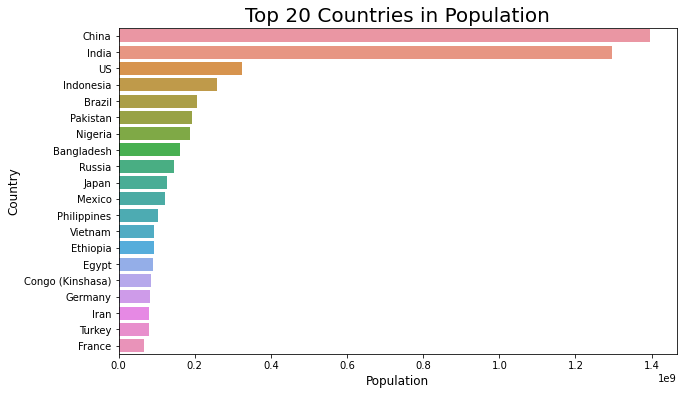

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Population',y=list(pop.index), data=pop)
plt.xlabel('Population',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Top 20 Countries in Population',fontsize=20)
plt.show()

In [ ]:
top_confirmed=confirmed.groupby('Country_Region').sum().sort_values(by='TargetValue',ascending=False).head(20)

In [ ]:
top_confirmed

,Id,Population,Weight,TargetValue,Month,Day
Country_Region,,,,,,
US,230790705600,137720737700,44278.376102,5979962,1583010,7003620
Brazil,1234800,28859025020,7.312979,772416,495,2190
Russia,8173200,20523885620,7.445536,493023,495,2190
United Kingdom,1486993200,9184073500,146.778232,291588,5445,24090
India,5664400,181329400000,6.672405,276583,495,2190
Spain,8878800,6501379080,7.930377,242280,495,2190
Italy,5899600,8493177140,7.812113,235763,495,2190
Peru,7938000,4408418000,8.108825,208823,495,2190
Canada,23696400,10598117600,132.626976,197414,6435,28470


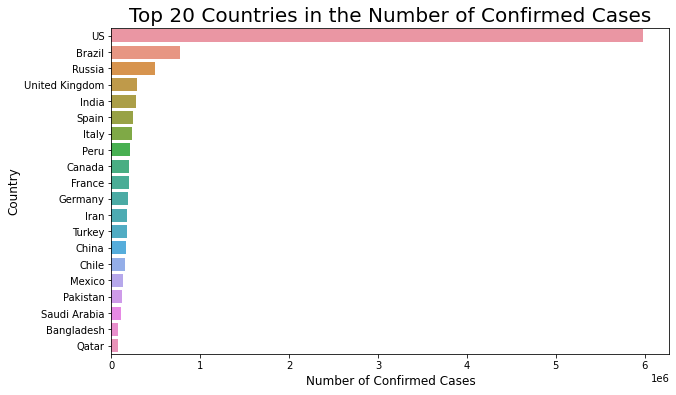

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='TargetValue',y=list(top_confirmed.index), data=top_confirmed)
plt.xlabel('Number of Confirmed Cases',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Top 20 Countries in the Number of Confirmed Cases',fontsize=20)
plt.show()

In [ ]:
confirmed['TargetValue'].sum()

11528819

In [ ]:
dead

,Id,Country_Region,Population,Weight,Date,Target,TargetValue,Month,Day
1,2,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0,1,23
3,4,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0,1,24
5,6,Afghanistan,27657145,0.583587,2020-01-25,Fatalities,0,1,25
7,8,Afghanistan,27657145,0.583587,2020-01-26,Fatalities,0,1,26
9,10,Afghanistan,27657145,0.583587,2020-01-27,Fatalities,0,1,27
...,...,...,...,...,...,...,...,...,...
969631,969632,Zimbabwe,14240168,0.607106,2020-06-06,Fatalities,0,6,6
969633,969634,Zimbabwe,14240168,0.607106,2020-06-07,Fatalities,0,6,7
969635,969636,Zimbabwe,14240168,0.607106,2020-06-08,Fatalities,0,6,8
969637,969638,Zimbabwe,14240168,0.607106,2020-06-09,Fatalities,0,6,9


In [ ]:
dead['TargetValue'].sum()

653271

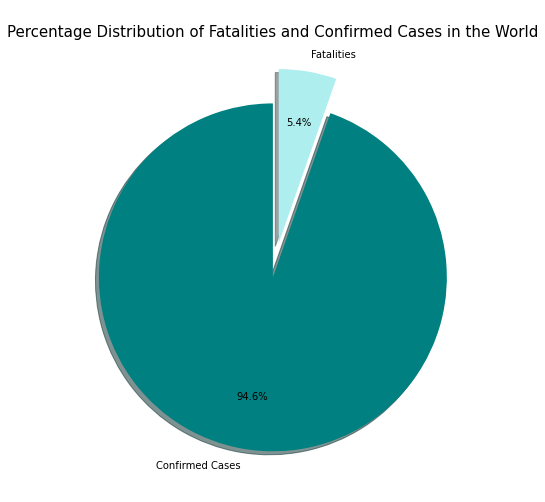

In [ ]:
plt.figure(figsize = (8,8))
plt.pie(x=[11528819,653271],labels=['Confirmed Cases','Fatalities'], autopct='%1.1f%%',pctdistance=0.7,labeldistance=1.1, explode=(0,0.2),shadow=True,startangle=90,colors= ['teal','paleturquoise'], data=train)
plt.title('\nPercentage Distribution of Fatalities and Confirmed Cases in the World\n',loc='center',fontsize=15)
plt.show()

In [ ]:
x=confirmed['TargetValue'].max()
y=confirmed[confirmed['TargetValue']==confirmed['TargetValue'].max()]['Day'].values[0]
z=confirmed[confirmed['TargetValue']==confirmed['TargetValue'].max()]['Month'].values[0]
v=confirmed[confirmed['TargetValue']==confirmed['TargetValue'].max()]['Country_Region'].values[0]
print(f'The highest number of confirmed cases in the world is {x} which was recorded in day {y} of month {z} in {v}.')

The highest number of confirmed cases in the world is 36163 which was recorded in day 24 of month 4 in US.


In [ ]:
confirmed_month_value=confirmed[['TargetValue','Month']]
confirmed_month_value

,TargetValue,Month
0,0,1
2,0,1
4,0,1
6,0,1
8,0,1
...,...,...
969630,14,6
969632,3,6
969634,5,6
969636,27,6


In [ ]:
sum_confirmed_month_value=confirmed_month_value.groupby('Month').sum()
sum_confirmed_month_value

,TargetValue
Month,
1,18639
2,145626
3,1157538
4,4209995
5,4383055
6,1613966


In [ ]:
sum_confirmed_month_value.columns=['Confirmed Cases']

In [ ]:
dead_month_value=dead[['TargetValue','Month']]

In [ ]:
sum_dead_month_value=dead_month_value.groupby('Month').sum()
sum_dead_month_value.columns=['Dead Cases']

In [ ]:
pd.merge(sum_confirmed_month_value,sum_dead_month_value, on='Month').iplot(kind='bar',color=['yellowgreen','green'], title='Worldwide Confirmed/Death Cases Over Time')
# plt.show()

In [ ]:
india=train[train['Country_Region']=='India']
india.shape
india.head(3)

,Id,Country_Region,Population,Weight,Date,Target,TargetValue,Month,Day
40320,40321,India,1295210000,0.04766,2020-01-23,ConfirmedCases,0,1,23
40321,40322,India,1295210000,0.47660,2020-01-23,Fatalities,0,1,23
40322,40323,India,1295210000,0.04766,2020-01-24,ConfirmedCases,0,1,24


In [ ]:
india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 40320 to 40599
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              280 non-null    int64         
 1   Country_Region  280 non-null    object        
 2   Population      280 non-null    int64         
 3   Weight          280 non-null    float64       
 4   Date            280 non-null    datetime64[ns]
 5   Target          280 non-null    object        
 6   TargetValue     280 non-null    int64         
 7   Month           280 non-null    int64         
 8   Day             280 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 21.9+ KB


In [ ]:
conf_ind=india[india['Target']=='ConfirmedCases']
conf_ind.reset_index(inplace=True)

conf_ind.drop(['index'],axis=1,inplace=True)
conf_ind.head(2)

,Id,Country_Region,Population,Weight,Date,Target,TargetValue,Month,Day
0,40321,India,1295210000,0.04766,2020-01-23,ConfirmedCases,0,1,23
1,40323,India,1295210000,0.04766,2020-01-24,ConfirmedCases,0,1,24


In [ ]:
x=conf_ind['TargetValue'].max()
y=conf_ind[conf_ind['TargetValue']==conf_ind['TargetValue'].max()]['Day'].values[0]
z=conf_ind[conf_ind['TargetValue']==conf_ind['TargetValue'].max()]['Month'].values[0]
print(f'The highest number of confirmed cases in India is {x} which was recorded in day {y} of month {z}.')

The highest number of confirmed cases in India is 10864 which was recorded in day 7 of month 6.


In [ ]:
dd_ind=india[india['Target']=='Fatalities']

In [ ]:
dd_ind.reset_index(inplace=True)

In [ ]:
dd_ind.drop(['index'],axis=1,inplace=True)

In [ ]:
dd_ind.head(2)

,Id,Country_Region,Population,Weight,Date,Target,TargetValue,Month,Day
0,40322,India,1295210000,0.4766,2020-01-23,Fatalities,0,1,23
1,40324,India,1295210000,0.4766,2020-01-24,Fatalities,0,1,24


In [ ]:
x=dd_ind['TargetValue'].max()
y=dd_ind[dd_ind['TargetValue']==dd_ind['TargetValue'].max()]['Day'].values[0]
z=dd_ind[dd_ind['TargetValue']==dd_ind['TargetValue'].max()]['Month'].values[0]
print(f'The highest number of confirmed cases in India is {x} which was recorded in day {y} of month {z}.')

The highest number of confirmed cases in India is 297 which was recorded in day 6 of month 6.


In [ ]:
mon_conf_ind=conf_ind.groupby('Month').sum()
mon_dd_ind=dd_ind.groupby('Month').sum()

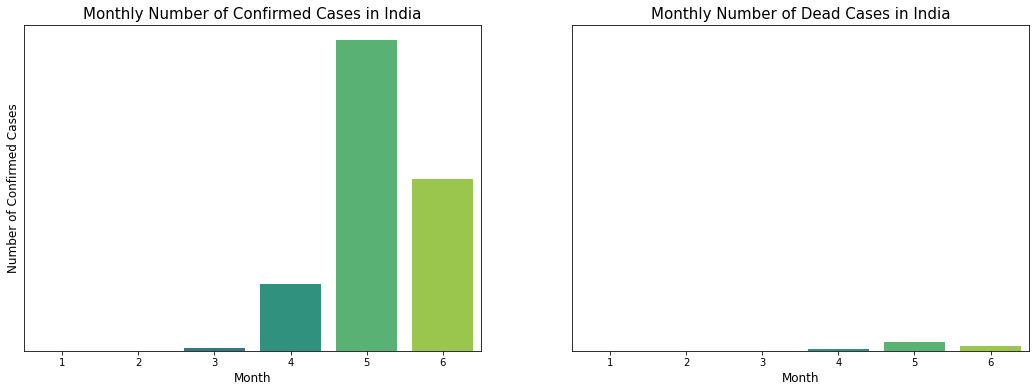

In [ ]:
plt.figure(figsize=(18,6))

ax1=plt.subplot(1,2,1)
sns.barplot(x=mon_conf_ind.index, y='TargetValue', data=mon_conf_ind,palette='viridis')
plt.xlabel('Month',fontsize=12)
plt.ylabel('Number of Confirmed Cases',fontsize=12)
plt.title('Monthly Number of Confirmed Cases in India',fontsize=15)

ax2=plt.subplot(1,2,2,sharey=ax1)
sns.barplot(x=mon_dd_ind.index, y='TargetValue', data=mon_dd_ind,palette='viridis')
plt.xlabel('Month',fontsize=12)
plt.ylabel('')
ax2.set_yticks([])
plt.title('Monthly Number of Dead Cases in India',fontsize=15)

plt.show()

In [ ]:
conf_ind['TargetValue'].sum()

276583

In [ ]:
dd_ind['TargetValue'].sum()

7745

<h4>Main Shit
</h4>

In [ ]:
train['Country_Region']
train['Target'].unique()

array(['ConfirmedCases', 'Fatalities'], dtype=object)

In [ ]:
le1=LabelEncoder()
le1.fit(train['Country_Region'])

LabelEncoder()

In [ ]:
train['Encoded_Country']=le1.transform(train['Country_Region'])

In [ ]:
train['Target']

0         ConfirmedCases
1             Fatalities
2         ConfirmedCases
3             Fatalities
4         ConfirmedCases
               ...      
969635        Fatalities
969636    ConfirmedCases
969637        Fatalities
969638    ConfirmedCases
969639        Fatalities
Name: Target, Length: 969640, dtype: object

In [ ]:
#Target

In [ ]:
le2=LabelEncoder()
le2.fit(train['Target'])
train['Encoded_Target']=le2.transform(train['Target'])

In [ ]:
train['Encoded_Target']

0         0
1         1
2         0
3         1
4         0
         ..
969635    1
969636    0
969637    1
969638    0
969639    1
Name: Encoded_Target, Length: 969640, dtype: int64

In [ ]:
train.head(3)

,Id,Country_Region,Population,Weight,Date,Target,TargetValue,Month,Day
0,1,Afghanistan,27657145.0,0.058359,2020-01-23,ConfirmedCases,0.0,1.0,23.0
1,2,Afghanistan,27657145.0,0.583587,2020-01-23,Fatalities,0.0,1.0,23.0
2,3,Afghanistan,27657145.0,0.058359,2020-01-24,ConfirmedCases,0.0,1.0,24.0


In [ ]:
y=train['TargetValue']
X=train[['Encoded_Country','Encoded_Target','Weight','Month','Day']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
rf=RandomForestRegressor()
rf.fit (X_train,y_train)
predictions_rf=rf.predict(X_test)


In [ ]:
min(X_train['Weight'])

0.0474907896777684

In [ ]:
print(le1.classes_[12])

Bahrain


In [ ]:
pred2 = rf.predict([[10,0,.567,6,25]])

In [ ]:
pred2

array([18.84])

In [ ]:
len(X_test)

193928

In [ ]:
min(predictions_rf)

-100.38

In [ ]:
print('RMSE_Random Forest Regression=', np.sqrt(metrics.mean_squared_error(y_test,predictions_rf)))
print('R2 Score_Random Forest Regression=',metrics.r2_score(y_test,predictions_rf))

RMSE_Random Forest Regression= 67.306215818419
R2 Score_Random Forest Regression= 0.9534202332046074


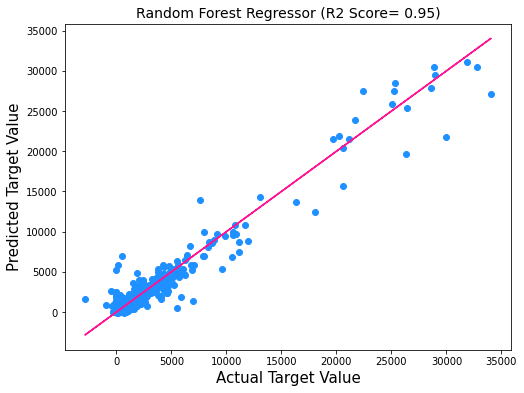

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(y_test,y_test,color='deeppink')
plt.scatter(y_test,predictions_rf,color='dodgerblue')
plt.xlabel('Actual Target Value',fontsize=15)
plt.ylabel('Predicted Target Value',fontsize=15)
plt.title('Random Forest Regressor (R2 Score= 0.95)',fontsize=14)
plt.show()

In [ ]:
xgbr= xgb.XGBRegressor(n_estimators=800, learning_rate=0.01, gamma=0, subsample=.7,
                       colsample_bytree=.7, max_depth=10,
                       min_child_weight=0, 
                       objective='reg:squarederror', nthread=-1, scale_pos_weight=1,
                       seed=27, reg_alpha=0.00006, n_jobs=-1)

In [ ]:
xgbr.fit(X_train,y_train)

In [ ]:
prediction_xgbr=xgbr.predict(X_test)
print('RMSE_XGBoost Regression=', np.sqrt(metrics.mean_squared_error(y_test,prediction_xgbr)))
print('R2 Score_XGBoost Regression=',metrics.r2_score(y_test,prediction_xgbr))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=prediction_xgbr, color='dodgerblue')
plt.plot(y_test,y_test, color='deeppink')
plt.xlabel('Actual Target Value',fontsize=15)
plt.ylabel('Predicted Target Value',fontsize=15)
plt.title('XGBoost Regressor (R2 Score= 0.89)',fontsize=14)
plt.show()